# The role of absolute humidity on transmission rates of the COVID-19 outbreak
### paper: Luo, W., Majumder, M.S., Liu, D., Poirier, C., Mandl, K.D., Lipsitch, M. and Santillana, M., 2020. The role of absolute humidity on transmission rates of the COVID-19 outbreak. medRxiv.
### data source:  https://github.com/midas-network/COVID-19/blob/master/data/data_from_papers/dataset_luo-et-al_202002/R0_absolute_humidity_Luo_et_al.2020.csv
### code is implemented by the NSF Spatiotemporal Innovation Center according to the paper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\44931\Desktop\LUO.txt')  #replace it with local file path
data.head()

,Province,R0_mean,Absolute_Humidity,Temperature_Mean,Cumulative_Cases,R0_confidence_interval_Upper,R0_confidence_interval_Lower,Country.Region,PopulationDensity_2014,Lat,Long,Capital
0,Heilongjiang,3.253333,1.496135,-15,331,4.58,1.36,Mainland China,81.0,47.86200,127.7622,Harbin
1,Jilin,3.177333,1.691746,-13,80,5.00,1.15,Mainland China,147.0,43.66657,126.1917,Changchun
2,Guizhou,2.612667,7.227437,9,109,6.33,0.91,Mainland China,199.0,26.81536,106.8748,Guiyang
3,South Korea,2.580000,3.271413,3,18,6.00,0.91,NaN,NaN,37.56650,126.9780,Seoul
4,Hubei,2.493333,5.733320,7,29631,3.39,1.52,Mainland China,313.0,30.97564,112.2707,Wuhan


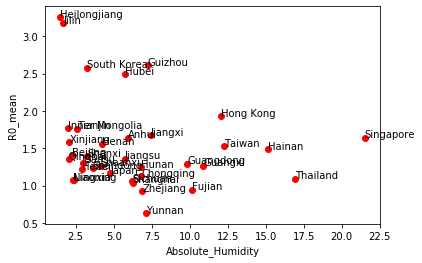

In [2]:
x = np.array(data.Absolute_Humidity[:-1])
y = np.array(data.R0_mean[:-1])
fig,ax=plt.subplots()
ax.scatter(x,y,c='r')
plt.xlabel('Absolute_Humidity')
plt.ylabel('R0_mean')
anno = np.array(data.Province[:-1])
for i in range(len(x)):
    ax.annotate(anno[i],(x[i],y[i]))

In [3]:
import statsmodels.api as sm
y = np.log(data.R0_mean[:-1])  #Delete Tibet and use logarithm form
X = data[['Absolute_Humidity', 'Temperature_Mean']][:-1]
X = sm.add_constant(X) ## add intercept
model = sm.OLS(y, X).fit() 
model.summary()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                R0_mean   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     5.795
Date:                Mon, 30 Mar 2020   Prob (F-statistic):            0.00697
Time:                        23:57:34   Log-Likelihood:                -7.3253
No. Observations:                  36   AIC:                             20.65
Df Residuals:                      33   BIC:                             25.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1887      0.116      1.621      0.115      -0.048       0.425
Absolute_Humidity     0.0690      0.027      2.538      0.016       0.014       0.124
Temperature_Mean     -0.0380      0.012     -3.249      0.003      -0.062      -0.014
==============================================================================
Omnibus:                        0.768   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.420
Skew:                           0.265   Prob(JB):                        0.811
Kurtosis:                       2.997   Cond. No.                         33.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Loess Regression (Locally Weighted Regression)

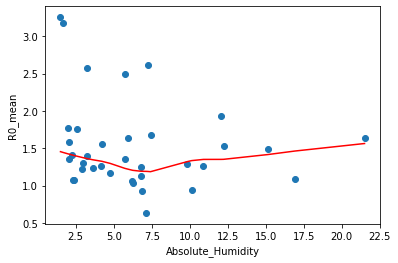

In [5]:
lowess = sm.nonparametric.lowess
x = np.array(data.Absolute_Humidity[:-1])
y = np.array(data.R0_mean[:-1])
z = lowess(y, x)
plt.scatter(x,y)
plt.plot(z[:,0],z[:,1],'r')
plt.xlabel('Absolute_Humidity')
plt.ylabel('R0_mean')
plt.show()

# Exponential Fit

[404.64568221  -3.51677631   1.40686777]


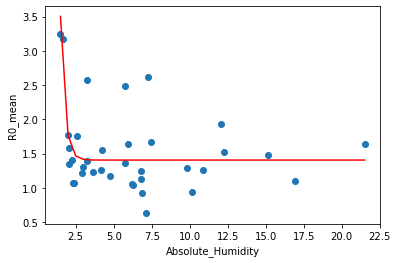

In [6]:
from scipy.optimize import curve_fit

#the function of exponentialfit
def func(x, a, b, c):
    return a * np.exp(b * x) + c

x = np.array(data.Absolute_Humidity[:-1])
y = np.array(data.R0_mean[:-1])
popt, pcov = curve_fit(func, x, y)
pltx = np.arange(1.496135,21.497618,0.5)
plty = [func(i, popt[0],popt[1],popt[2]) for i in pltx]
plt.scatter(x,y)
plt.xlabel('Absolute_Humidity')
plt.ylabel('R0_mean')
plt.plot(pltx,plty,'r')
print(popt)